In [7]:
import requests
from datetime import datetime
import string
import random
import base64


def createcreds(usr,pwd):
    input = "" + usr + ":" + pwd
    return "Basic " + base64.b64encode(input.encode("ascii")).decode("ascii")

def get_random_string(length):
    # choose from all lowercase letter
    letters = string.ascii_lowercase
    result_str = ''.join(random.choice(letters) for i in range(length))
    return result_str
# response = requests.get('http://host.docker.internal/register', json={
#     "username": "yggo",
#     "password": "qwerty",
#     "email": "tesit@exmaple.com"
#     })
now = "yaboji"
response = requests.post("http://host.docker.internal/register",json={"username": now, "password":now, "email": now} )
text = response.json()
print(text["id"])
if response.ok:
    creds = createcreds(now, now)
    print("creds: ",creds)
    loginattempt = requests.get("http://host.docker.internal/login", headers={"Authorization":creds})
    print(loginattempt.text, loginattempt.status_code, loginattempt.reason)
    dele = requests.delete("http://host.docker.internal/customers/" + text["id"])
    print(dele.text)

    #requests.get("/login", headers={"Authorization":createcreds(randomstring, "qwerty")})


# now = get_random_string(random.choice([4,5,6,7,8,9]))
# response = requests.post("http://host.docker.internal/register", json={"username": now, "password":"qwerty", "email": now } )
# id = response
# #
# loginres = requests.get("/login", headers={"Authorization":createcreds(now, "qwerty")})
# print(id)

ModuleNotFoundError: No module named 'requests'

In [8]:
import base64

input = "locust:locust"
bytes = input.encode("ascii")
base64_bytes = base64.b64encode(bytes)
base64_string = base64_bytes.decode("ascii")


print(base64.b64encode(input.encode("ascii")).decode("ascii"))

bG9jdXN0OmxvY3VzdA==


In [9]:
string = "abscd"
splitter = string.split("s",2)
print(splitter)

['ab', 'cd']


In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Set the random seed for reproducibility
np.random.seed(0)

# Create feature A with high variance and higher overall values
feature_A = np.random.randint(100, 200, 10)

# Create feature B with low variance and lower overall values
feature_B = np.random.normal(loc=5, scale=1, size=10)

# Create a DataFrame
df = pd.DataFrame({
    'Feature_A': feature_A,
    'Feature_B': feature_B
})

# Calculate variances before normalization
variance_A_before = np.var(feature_A)
variance_B_before = np.var(feature_B)

print("Variance of Feature A before normalization:", variance_A_before)
print("Variance of Feature B before normalization:", variance_B_before)

# Perform normalization using StandardScaler
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Calculate variances after normalization
variance_A_after = np.var(df_normalized['Feature_A'])
variance_B_after = np.var(df_normalized['Feature_B'])

print("Variance of Feature A after normalization:", variance_A_after)
print("Variance of Feature B after normalization:", variance_B_after)


Variance of Feature A before normalization: 593.25
Variance of Feature B before normalization: 0.7984345266837686
Variance of Feature A after normalization: 1.0
Variance of Feature B after normalization: 1.0000000000000002


In [12]:
from sklearn.preprocessing import MinMaxScaler

# Perform normalization using MinMaxScaler
scaler = MinMaxScaler()
df_min_max_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Calculate variances after normalization (min-max scaling)
variance_A_after_min_max_scaling = np.var(df_min_max_scaled['Feature_A'])
variance_B_after_min_max_scaling = np.var(df_min_max_scaled['Feature_B'])

print("Variance of Feature A after min-max scaling:", variance_A_after_min_max_scaling)
print("Variance of Feature B after min-max scaling:", variance_B_after_min_max_scaling)


Variance of Feature A after min-max scaling: 0.09750986193293887
Variance of Feature B after min-max scaling: 0.08576950075275565


/home/magnus/.pyenv/versions/3.9.18/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/magnus/.pyenv/versions/3.9.18/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/magnus/.pyenv/versions/3.9.18/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/magnus/.pyenv/versions/3.9.18/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

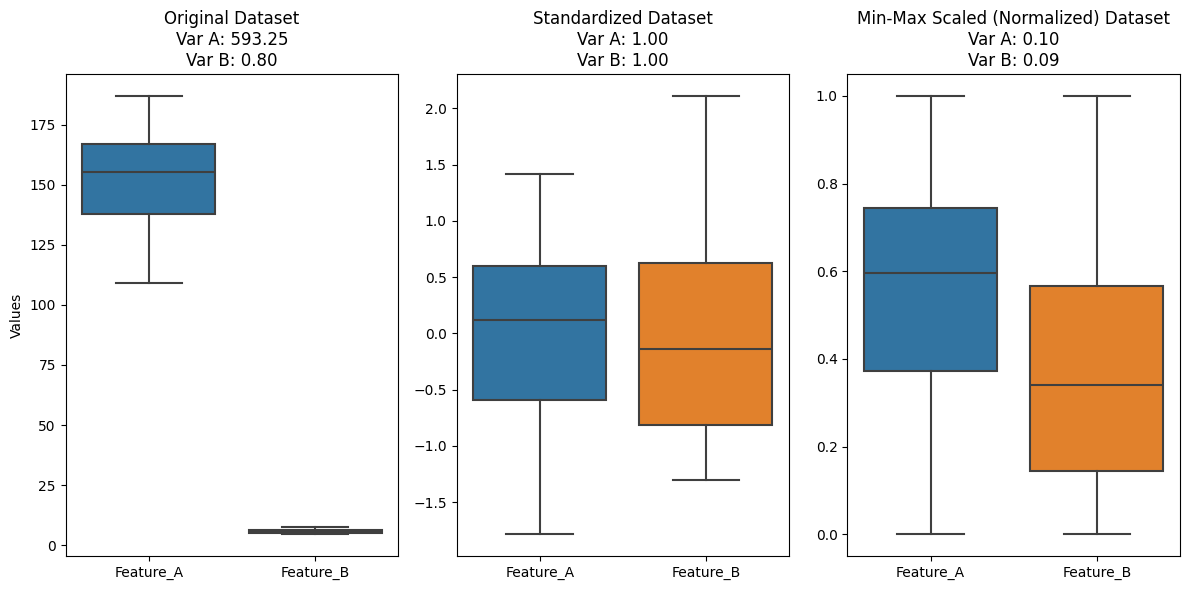

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Set the random seed for reproducibility
np.random.seed(0)

# Create feature A with high variance and higher overall values
feature_A = np.random.randint(100, 200, 10)

# Create feature B with low variance and lower overall values
feature_B = np.random.normal(loc=5, scale=1, size=10)

# Create a DataFrame
df = pd.DataFrame({
    'Feature_A': feature_A,
    'Feature_B': feature_B
})

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Draw the original dataset
plt.subplot(1, 3, 1)
sns.boxplot(data=df)
plt.title('Original Dataset\n' +
          f'Var A: {np.var(df["Feature_A"]):.2f}\n' +
          f'Var B: {np.var(df["Feature_B"]):.2f}')
plt.ylabel('Values')

# Standardization
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(df), columns=df.columns)

# Draw the standardized dataset
plt.subplot(1, 3, 2)
sns.boxplot(data=df_standardized)
plt.title('Standardized Dataset\n' +
          f'Var A: {np.var(df_standardized["Feature_A"]):.2f}\n' +
          f'Var B: {np.var(df_standardized["Feature_B"]):.2f}')

# Min-Max Scaling (Normalization)
scaler_min_max = MinMaxScaler()
df_min_max_scaled = pd.DataFrame(scaler_min_max.fit_transform(df), columns=df.columns)

# Draw the min-max scaled dataset
plt.subplot(1, 3, 3)
sns.boxplot(data=df_min_max_scaled)
plt.title('Min-Max Scaled (Normalized) Dataset\n' +
          f'Var A: {np.var(df_min_max_scaled["Feature_A"]):.2f}\n' +
          f'Var B: {np.var(df_min_max_scaled["Feature_B"]):.2f}')

plt.tight_layout()
plt.show()


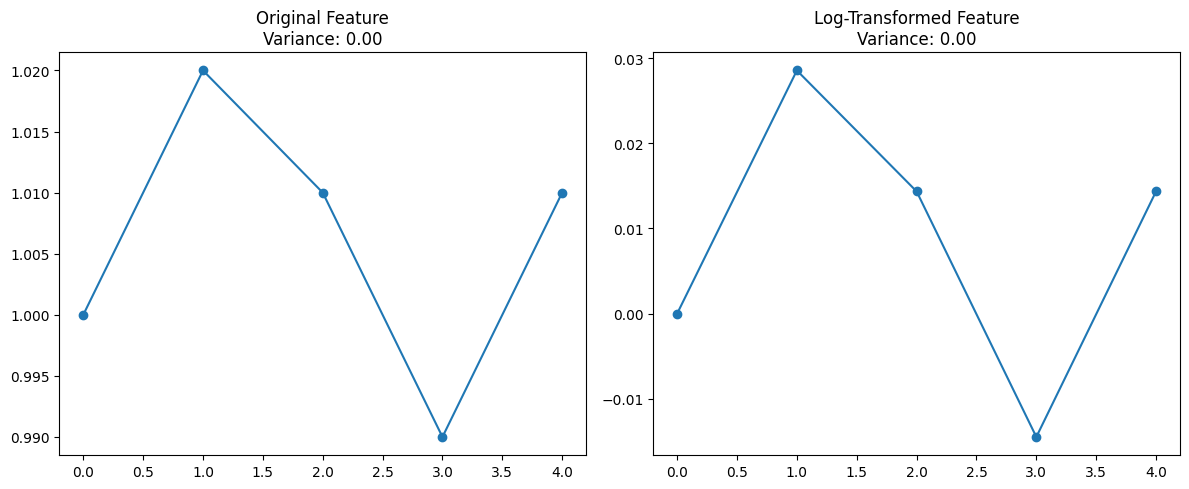

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define a skewed dataset
X = np.array([1,1.02,1.01,0.99,1.01])

# Calculate the original variance
original_variance = np.var(X)

# Apply the logarithm transformation (base 2 for simplicity)
Y = np.log2(X)

# Calculate the variance of the transformed feature
log_variance = np.var(Y)

# Visualize the original and transformed features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(X, 'o-')
plt.title(f'Original Feature\nVariance: {original_variance:.2f}')

plt.subplot(1, 2, 2)
plt.plot(Y, 'o-')
plt.title(f'Log-Transformed Feature\nVariance: {log_variance:.2f}')

plt.tight_layout()
plt.show()



In [ ]:
Y

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])